In [161]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [162]:
hospitalspending_2015 = "Medicare_Hospital_Spending_by_Claim.csv"

hospitalspending_2015_df = pd.read_csv(hospitalspending_2015)
hospitalspending_2015_df

,Hospital_Name,Provider_ID,State,Period,Claim_Type,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Percent_of_Spending_Hospital,Percent_of_Spending_State,Percent_of_Spending_Nation,Start_Date,End_Date
0,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Skilled Nursing Facility,$0,$0,$0,0%,0%,0%,1012015,12312015
1,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Durable Medical Equipment,$18,$31,$24,0.10%,0.16%,0.12%,1012015,12312015
2,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Carrier,"$1,062","$1,480","$1,540",6.01%,7.71%,7.52%,1012015,12312015
3,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Home Health Agency,$917,$948,$816,5.19%,4.94%,3.98%,1012015,12312015
4,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Hospice,$172,$154,$122,0.97%,0.80%,0.60%,1012015,12312015
5,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Inpatient,"$2,518","$2,634","$2,702",14.25%,13.72%,13.18%,1012015,12312015
6,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Outpatient,$473,$596,$730,2.68%,3.10%,3.56%,1012015,12312015
7,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Skilled Nursing Facility,"$3,544","$2,626","$3,319",20.06%,13.67%,16.19%,1012015,12312015
8,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Durable Medical Equipment,$79,$126,$103,0.45%,0.66%,0.50%,1012015,12312015
9,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Carrier,$970,"$1,046","$1,110",5.49%,5.45%,5.42%,1012015,12312015


In [163]:
hospitalspending_state_df = hospitalspending_2015_df[["State","Claim_Type", "Avg_Spending_Per_Episode_State", "Percent_of_Spending_State"]]
hospitalspending_state_df .head()

,State,Claim_Type,Avg_Spending_Per_Episode_State,Percent_of_Spending_State
0,AL,Skilled Nursing Facility,$0,0%
1,AL,Durable Medical Equipment,$31,0.16%
2,AL,Carrier,"$1,480",7.71%
3,AL,Home Health Agency,$948,4.94%
4,AL,Hospice,$154,0.80%


In [164]:
hs_state_totalperhospital= hospitalspending_state_df.loc[hospitalspending_state_df ["Claim_Type"] =="Total", ["State","Claim_Type", "Avg_Spending_Per_Episode_State"]]
hs_state_totalperhospital.head()

,State,Claim_Type,Avg_Spending_Per_Episode_State
10,AL,Total,"$19,201"
32,AL,Total,"$19,201"
54,AL,Total,"$19,201"
79,AL,Total,"$19,201"
101,AL,Total,"$19,201"


In [165]:
hs_state_totalperhospital.index = range(len(hs_state_totalperhospital))
hs_state_totalperhospital.head()

,State,Claim_Type,Avg_Spending_Per_Episode_State
0,AL,Total,"$19,201"
1,AL,Total,"$19,201"
2,AL,Total,"$19,201"
3,AL,Total,"$19,201"
4,AL,Total,"$19,201"


In [166]:
hs_state_totalperhospital["Avg_Spending_Per_Episode_State"] = hs_state_totalperhospital["Avg_Spending_Per_Episode_State"].replace('[\$,]', '', regex=True).astype(float)
hs_state_totalperhospital.head()

,State,Claim_Type,Avg_Spending_Per_Episode_State
0,AL,Total,19201.0
1,AL,Total,19201.0
2,AL,Total,19201.0
3,AL,Total,19201.0
4,AL,Total,19201.0


In [167]:
grouped_hs_state = hs_state_totalperhospital.groupby(['State'])
#print(hs_state_totalperhospital)
grouped_hs_state.count().head()

,Claim_Type,Avg_Spending_Per_Episode_State
State,,
AK,8,8
AL,82,82
AR,43,43
AZ,62,62
CA,288,288


In [168]:
hs_state_mean=grouped_hs_state["Avg_Spending_Per_Episode_State"].mean()
hs_state_mean.head()

State
AK    19907.0
AL    19201.0
AR    19705.0
AZ    20542.0
CA    21141.0
Name: Avg_Spending_Per_Episode_State, dtype: float64

In [169]:
hs_state_mean.count()

50

In [170]:
affordable_care = "states.csv"

affordable_care_df = pd.read_csv(affordable_care)
affordable_care_df

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777
5,Colorado,15.9%,8.1%,-7.8%,419000,2949000,108311,67062,$318,True,783420.0,1375264,591844.0,820234
6,Connecticut,9.1%,6%,-3.1%,110000,2148000,102917,80759,$357,True,NaN,761137,NaN,644136
7,Delaware,9.7%,5.9%,-3.8%,35000,564000,25379,21467,$330,True,223324.0,236702,13378.0,186835
8,District of Columbia,7.6%,3.8%,-3.8%,25000,388000,17666,1224,$183,True,235786.0,255491,19705.0,90492
9,Florida,21.3%,13.3%,-8%,1597000,8847000,1531714,1428712,$305,False,3104996.0,3644673,539677.0,4149593


In [171]:
affordable_care_df.count()

State                                           52
Uninsured Rate (2010)                           52
Uninsured Rate (2015)                           52
Uninsured Rate Change (2010-2015)               52
Health Insurance Coverage Change (2010-2015)    52
Employer Health Insurance Coverage (2015)       52
Marketplace Health Insurance Coverage (2016)    52
Marketplace Tax Credits (2016)                  52
Average Monthly Tax Credit (2016)               52
State Medicaid Expansion (2016)                 51
Medicaid Enrollment (2013)                      50
Medicaid Enrollment (2016)                      52
Medicaid Enrollment Change (2013-2016)          50
Medicare Enrollment (2016)                      52
dtype: int64

In [172]:
affordable_care_df.drop(affordable_care_df.tail(1).index,inplace=True)
affordable_care_df

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777
5,Colorado,15.9%,8.1%,-7.8%,419000,2949000,108311,67062,$318,True,783420.0,1375264,591844.0,820234
6,Connecticut,9.1%,6%,-3.1%,110000,2148000,102917,80759,$357,True,NaN,761137,NaN,644136
7,Delaware,9.7%,5.9%,-3.8%,35000,564000,25379,21467,$330,True,223324.0,236702,13378.0,186835
8,District of Columbia,7.6%,3.8%,-3.8%,25000,388000,17666,1224,$183,True,235786.0,255491,19705.0,90492
9,Florida,21.3%,13.3%,-8%,1597000,8847000,1531714,1428712,$305,False,3104996.0,3644673,539677.0,4149593


In [173]:
state_abbreviations = "state_abbreviations (1).csv"

state_abbreviations_df = pd.read_csv(state_abbreviations)
state_abbreviations_df.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [174]:
state_abbreviations_df.count()

State           51
Abbreviation    51
dtype: int64

In [175]:
affordable_care_df['State Abbreviation']= state_abbreviations_df['Abbreviation']
affordable_care_df

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),State Abbreviation
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855,AL
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966,AK
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624,AZ
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146,AR
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777,CA
5,Colorado,15.9%,8.1%,-7.8%,419000,2949000,108311,67062,$318,True,783420.0,1375264,591844.0,820234,CO
6,Connecticut,9.1%,6%,-3.1%,110000,2148000,102917,80759,$357,True,NaN,761137,NaN,644136,CT
7,Delaware,9.7%,5.9%,-3.8%,35000,564000,25379,21467,$330,True,223324.0,236702,13378.0,186835,DE
8,District of Columbia,7.6%,3.8%,-3.8%,25000,388000,17666,1224,$183,True,235786.0,255491,19705.0,90492,DC
9,Florida,21.3%,13.3%,-8%,1597000,8847000,1531714,1428712,$305,False,3104996.0,3644673,539677.0,4149593,FL


In [176]:
affordable_care_df = affordable_care_df.drop(affordable_care_df.index[8])#s

In [177]:
cols = list(affordable_care_df.columns.values)#check
print (cols)

['State', 'Uninsured Rate (2010)', 'Uninsured Rate (2015)', 'Uninsured Rate Change (2010-2015)', 'Health Insurance Coverage Change (2010-2015)', 'Employer Health Insurance Coverage (2015)', 'Marketplace Health Insurance Coverage (2016)', 'Marketplace Tax Credits (2016)', 'Average Monthly Tax Credit (2016)', 'State Medicaid Expansion (2016)', 'Medicaid Enrollment (2013)', 'Medicaid Enrollment (2016)', 'Medicaid Enrollment Change (2013-2016)', 'Medicare Enrollment (2016)', 'State Abbreviation']


In [178]:
affordable_care_df['Uninsured Rate Change (2010-2015)'] = affordable_care_df['Uninsured Rate Change (2010-2015)'].replace('[\%,]', '', regex=True).astype(float)
affordable_care_df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),State Abbreviation
0,Alabama,14.6%,10.1%,-4.5,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855,AL
1,Alaska,19.9%,14.9%,-5.0,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966,AK
2,Arizona,16.9%,10.8%,-6.1,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624,AZ
3,Arkansas,17.5%,9.5%,-8.0,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146,AR
4,California,18.5%,8.6%,-9.9,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777,CA


In [179]:
x_axis = np.arange(len(affordable_care_df))
tick_locations = [value+0.4 for value in x_axis]

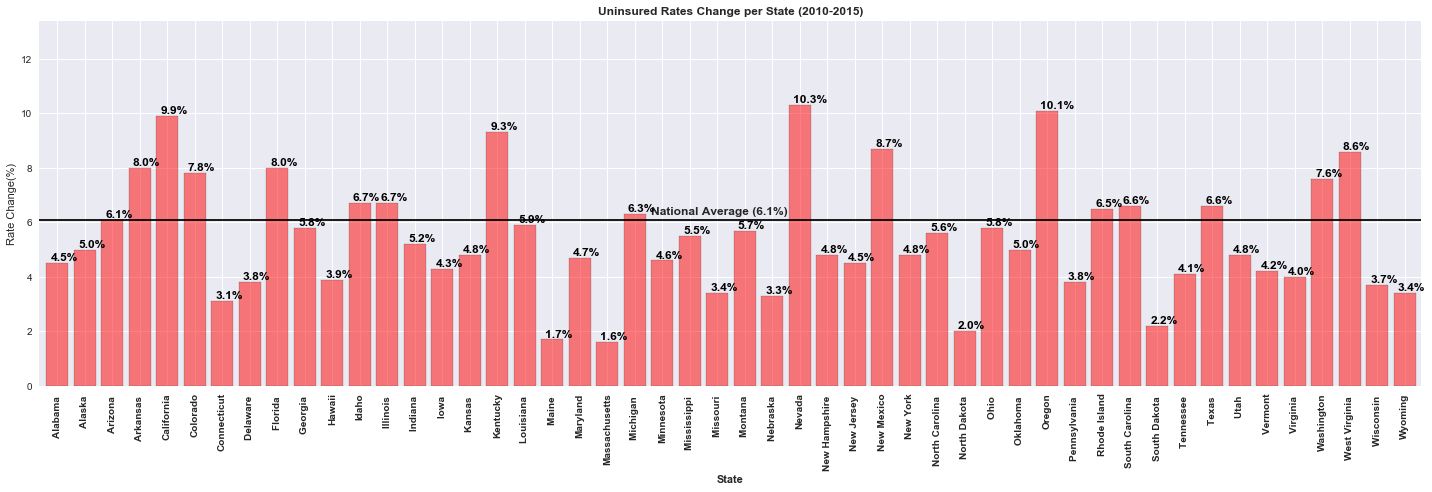

In [180]:
# Create a list indicating where to write x labels and set figure size to adjust for space
sns.set()
plt.figure(figsize=(20,7))
plt.bar(x_axis, (affordable_care_df['Uninsured Rate Change (2010-2015)']*-1), color='r', alpha=0.5, align="edge", edgecolor = 'black')
plt.xticks(tick_locations, affordable_care_df["State"], rotation="vertical",fontweight='bold')
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(affordable_care_df['Uninsured Rate Change (2010-2015)'])+15)
plt.axhline(y=6.1, color = 'black') #adds a horizontal line for national average
plt.text(22,6.3,'National Average (6.1%)',fontweight='bold')
for i, v in enumerate(affordable_care_df['Uninsured Rate Change (2010-2015)']*-1):
    plt.text(i+.15, v+.09, str(v)+"%", color='black', fontweight='bold')
# Set a Title and labels
plt.title("Uninsured Rates Change per State (2010-2015)",fontweight='bold')
plt.xlabel("State",fontweight='bold')
plt.ylabel("Rate Change(%)")
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Uninsured Rates Change per State (2010-2015).png")
plt.show()

In [181]:
affordable_care_sort=affordable_care_df.sort_values(['Uninsured Rate Change (2010-2015)'], ascending = True)

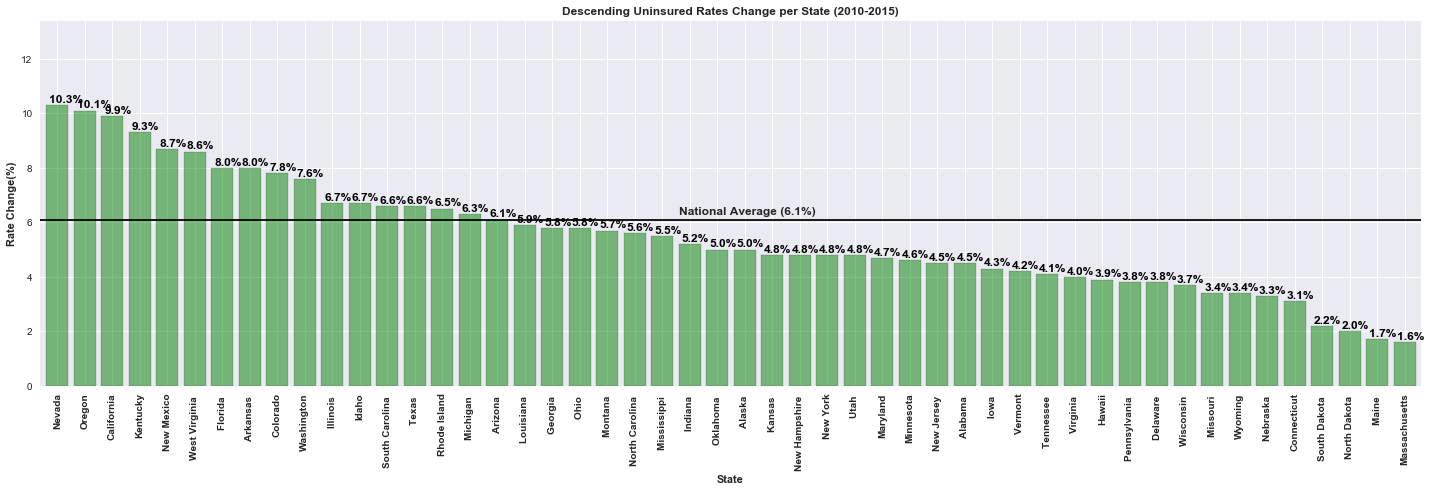

In [182]:
sns.set()
x_axis = np.arange(len(affordable_care_sort))
tick_locations = [value+0.4 for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,7))
plt.bar(x_axis, (affordable_care_sort['Uninsured Rate Change (2010-2015)']*-1), color='g', alpha=0.5, align="edge", edgecolor = 'black')
plt.xticks(tick_locations, affordable_care_sort["State"], rotation="vertical",fontweight='bold')
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(affordable_care_sort['Uninsured Rate Change (2010-2015)'])+15)
plt.axhline(y=6.1, color = 'black') #adds a horizontal line for national average
plt.text(23,6.3,'National Average (6.1%)',fontweight='bold')
for i, v in enumerate(affordable_care_sort['Uninsured Rate Change (2010-2015)']*-1):
    plt.text(i+.1, v+.1, str(v)+"%", color='black', fontweight='bold')
# Set a Title and labels
plt.title("Descending Uninsured Rates Change per State (2010-2015)", fontweight='bold')
plt.xlabel("State", fontweight='bold')
plt.ylabel("Rate Change(%)",fontweight='bold')
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Uninsured Rates Change per State (2010-2015) Descending.png")
plt.show()

In [199]:
Medicaid_Expansion = affordable_care_sort[affordable_care_sort['State Medicaid Expansion (2016)']==True]
# # # Medicaid_Expansion = affordable_care_sort[affordable_care_sort['State Medicaid Expansion (2016)'].values =='True']
Medicaid_Expansion.head()
# # affordable_care_sort.head()
#affordable_care_sort['State Medicaid Expansion (2016)'].unique()


,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),State Abbreviation
28,Nevada,22.6%,12.3%,-10.3,294000,1505000,79876,71472,$268,True,332560.0,614298,281738.0,471747,ND
37,Oregon,17.1%,7%,-10.1,403000,2070000,131167,95507,$253,True,626356.0,1021862,395506.0,784032,MO
4,California,18.5%,8.6%,-9.9,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777,CA
17,Kentucky,15.3%,6%,-9.3,404000,2316000,74640,56488,$258,True,606805.0,1220788,613983.0,881938,KY
31,New Mexico,19.6%,10.9%,-8.7,178000,884000,47497,32703,$212,True,457678.0,766732,309054.0,385918,OR


In [200]:
NoMedicaid_Expansion = affordable_care_sort[affordable_care_sort['State Medicaid Expansion (2016)']==False]
NoMedicaid_Expansion.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),State Abbreviation
9,Florida,21.3%,13.3%,-8.0,1597000,8847000,1531714,1428712,$305,False,3104996.0,3644673,539677.0,4149593,FL
12,Idaho,17.7%,11%,-6.7,109000,836000,94270,82802,$265,False,238150.0,293905,55755.0,294284,ID
40,South Carolina,17.5%,10.9%,-6.6,317000,2487000,204846,186345,$312,False,889744.0,994804,105060.0,974114,SC
43,Texas,23.7%,17.1%,-6.6,1781000,13709000,1092650,913177,$271,False,4441605.0,4770229,328624.0,3765946,TX
10,Georgia,19.7%,13.9%,-5.8,581000,5240000,478016,427353,$291,False,1535090.0,1782301,247211.0,1574058,GA
